In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns


from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd
df = pd.read_csv('/content/comments.csv',encoding='latin-1')
df.head()

<ipython-input-3-3682985bf1db>:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/comments.csv',encoding='latin-1')


,comment_id,score,self_text,subreddit,created_time,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111
0,k5480sx,1,Exactly! I can remember the humanitarian aid s...,worldnews,45215.81875,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,k547q14,1,*We are the only part of the World that has Fr...,Palestine,45215.8166666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,k547elf,1,"I dont make Israeli strategy, nor am I Israel...",worldnews,45215.8152777778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,k54742r,1,These people didn't vote Hamas in or something...,worldnews,45215.8138888889,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,k5473zi,1,We don't care what you do. We just want to liv...,worldnews,45215.8138888889,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cnull=df.isnull().sum()
sumnull=df.isnull().sum().sum()
print(cnull)
print("null values",sumnull)

comment_id         130
score              266
self_text          326
subreddit          815
created_time       831
                 ...  
Unnamed: 107    190211
Unnamed: 108    190211
Unnamed: 109    190211
Unnamed: 110    190210
Unnamed: 111    190210
Length: 112, dtype: int64
null values 20354851


In [ ]:
df.drop_duplicates(inplace=True)  # remove duplicates
df

,comment_id,score,self_text,subreddit,created_time,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111
0,k5480sx,1,Exactly! I can remember the humanitarian aid s...,worldnews,45215.81875,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,k547q14,1,*We are the only part of the World that has Fr...,Palestine,45215.8166666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,k547elf,1,"I dont make Israeli strategy, nor am I Israel...",worldnews,45215.8152777778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,k54742r,1,These people didn't vote Hamas in or something...,worldnews,45215.8138888889,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,k5473zi,1,We don't care what you do. We just want to liv...,worldnews,45215.8138888889,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190206,k3sdwfc,42,US. This is bullshit,Palestine,45206.222222,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190207,k3sdixt,1,I am in the United States and it has the dotte...,Palestine,45206.220139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190208,k3sccp2,54,In which country are you?\nSometimes maps adap...,Palestine,45206.213889,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190209,k3ritvj,116,You can't give up on something you only preten...,worldnews,45206.073611,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# slicing the date , and removing the time portion
df['created_time'] = df.created_time.str.slice(0, 10)
df

,comment_id,score,self_text,subreddit,created_time,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111
0,k5480sx,1,Exactly! I can remember the humanitarian aid s...,worldnews,45215.8187,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,k547q14,1,*We are the only part of the World that has Fr...,Palestine,45215.8166,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,k547elf,1,"I dont make Israeli strategy, nor am I Israel...",worldnews,45215.8152,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,k54742r,1,These people didn't vote Hamas in or something...,worldnews,45215.8138,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,k5473zi,1,We don't care what you do. We just want to liv...,worldnews,45215.8138,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190206,k3sdwfc,42,US. This is bullshit,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190207,k3sdixt,1,I am in the United States and it has the dotte...,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190208,k3sccp2,54,In which country are you?\nSometimes maps adap...,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190209,k3ritvj,116,You can't give up on something you only preten...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking all the unique dates in the dataset
print(df['created_time'].unique())

# checking how many unique language
# tweets are present in the dataset
print(df["self_text"].unique())

['45215.8187' '45215.8166' '45215.8152' ... '45207.1145' '45207.1138'
 '45207.1131']
["Exactly! I can remember the humanitarian aid streaming into Stepanekert a few weeks ago, just like it streamed into Mariupol last year, into Raqqa and Mosul a few years ago, or even - let's delve into history for a moment - all the humanitarian aid that streamed into Stalingrad or Leningrad back in WW2."
 '*We are the only part of the World that has Freedom of Speech!*\n\n - Person exercises its freedom of Speech\n\n*??? No not like that!!! You are now banned and censored!!!*'
 'I don\x19t make Israeli strategy, nor am I Israeli or Jewish. But, no I don\x19t support doing those things. \nBut, I am aware that Israel is capable of doing those things. So be realistic, and try to figure out why countries might do certain things. History provides perfect parallels the majority of the time.'
 ...
 'In which country are you?\nSometimes maps adapt to the countries view on the matter. In France, I can see all

In [ ]:
# before removing the non-english tweets
print(df.shape)



(190041, 112)


In [ ]:
# Removing RT, Punctuation etc
def remove_rt(x): return re.sub('RT @\w+: ', " ", str(x))

def rt(x): return re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(x))

df["self_text"] = df.self_text.map(remove_rt).map(rt)
df["self_text"] = df.self_text.str.lower()
df['self_text'][0:10]

0    exactly  i can remember the humanitarian aid s...
1     we are the only part of the world that has fr...
2    i don t make israeli strategy  nor am i israel...
3    these people didn t vote hamas in or something...
4    we don t care what you do  we just want to liv...
5    hamas exists because of the israeli control of...
6    i ll forward it when i have time to find it   ...
7    you can inverte the flags and its gonna still ...
8    i wish the media would talk more about the par...
9    they are blinded by social media fake news  th...
Name: self_text, dtype: object

In [ ]:
df[['polarity', 'subjectivity']][0:10] = df['self_text'][0:10].apply(
    lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['self_text'][0:10].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
      df.loc[index, 'sentiment']= "neutral"

    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound']= comp

<ipython-input-40-33f6197be582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['polarity', 'subjectivity']][0:10] = df['self_text'][0:10].apply(
<ipython-input-40-33f6197be582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['polarity', 'subjectivity']][0:10] = df['self_text'][0:10].apply(
<ipython-input-40-33f6197be582>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df['self_text'][0:10].iteritems():


In [ ]:
df[["self_text",
        "subjectivity", "neg", "neu", "pos"]].head(10)

,self_text,subjectivity,neg,neu,pos
0,exactly i can remember the humanitarian aid s...,0.103333,0.000,0.949,0.051
1,we are the only part of the world that has fr...,NaN,0.221,0.571,0.208
2,i don t make israeli strategy nor am i israel...,NaN,0.045,0.721,0.235
3,these people didn t vote hamas in or something...,NaN,0.094,0.862,0.044
4,we don t care what you do we just want to liv...,NaN,0.387,0.557,0.056
5,hamas exists because of the israeli control of...,NaN,0.000,0.806,0.194
6,i ll forward it when i have time to find it ...,NaN,0.000,0.940,0.060
7,you can inverte the flags and its gonna still ...,NaN,0.118,0.803,0.079
8,i wish the media would talk more about the par...,NaN,0.379,0.587,0.034
9,they are blinded by social media fake news th...,NaN,0.149,0.757,0.094


In [ ]:
total_pos = len(df.loc[df['sentiment'] == "positive"])
total_neg = len(df.loc[df['sentiment'] == "negative"])
total_neu = len(df.loc[df['sentiment'] == "neutral"])
total_tweets = len(df)
print("Total Positive Tweets % : {:.2f}"
      .format((total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}"
      .format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}"
      .format((total_neu/total_tweets)*100))

Total Positive Tweets % : 0.00
Total Negative Tweets % : 0.00
Total Neutral Tweets % : 0.00


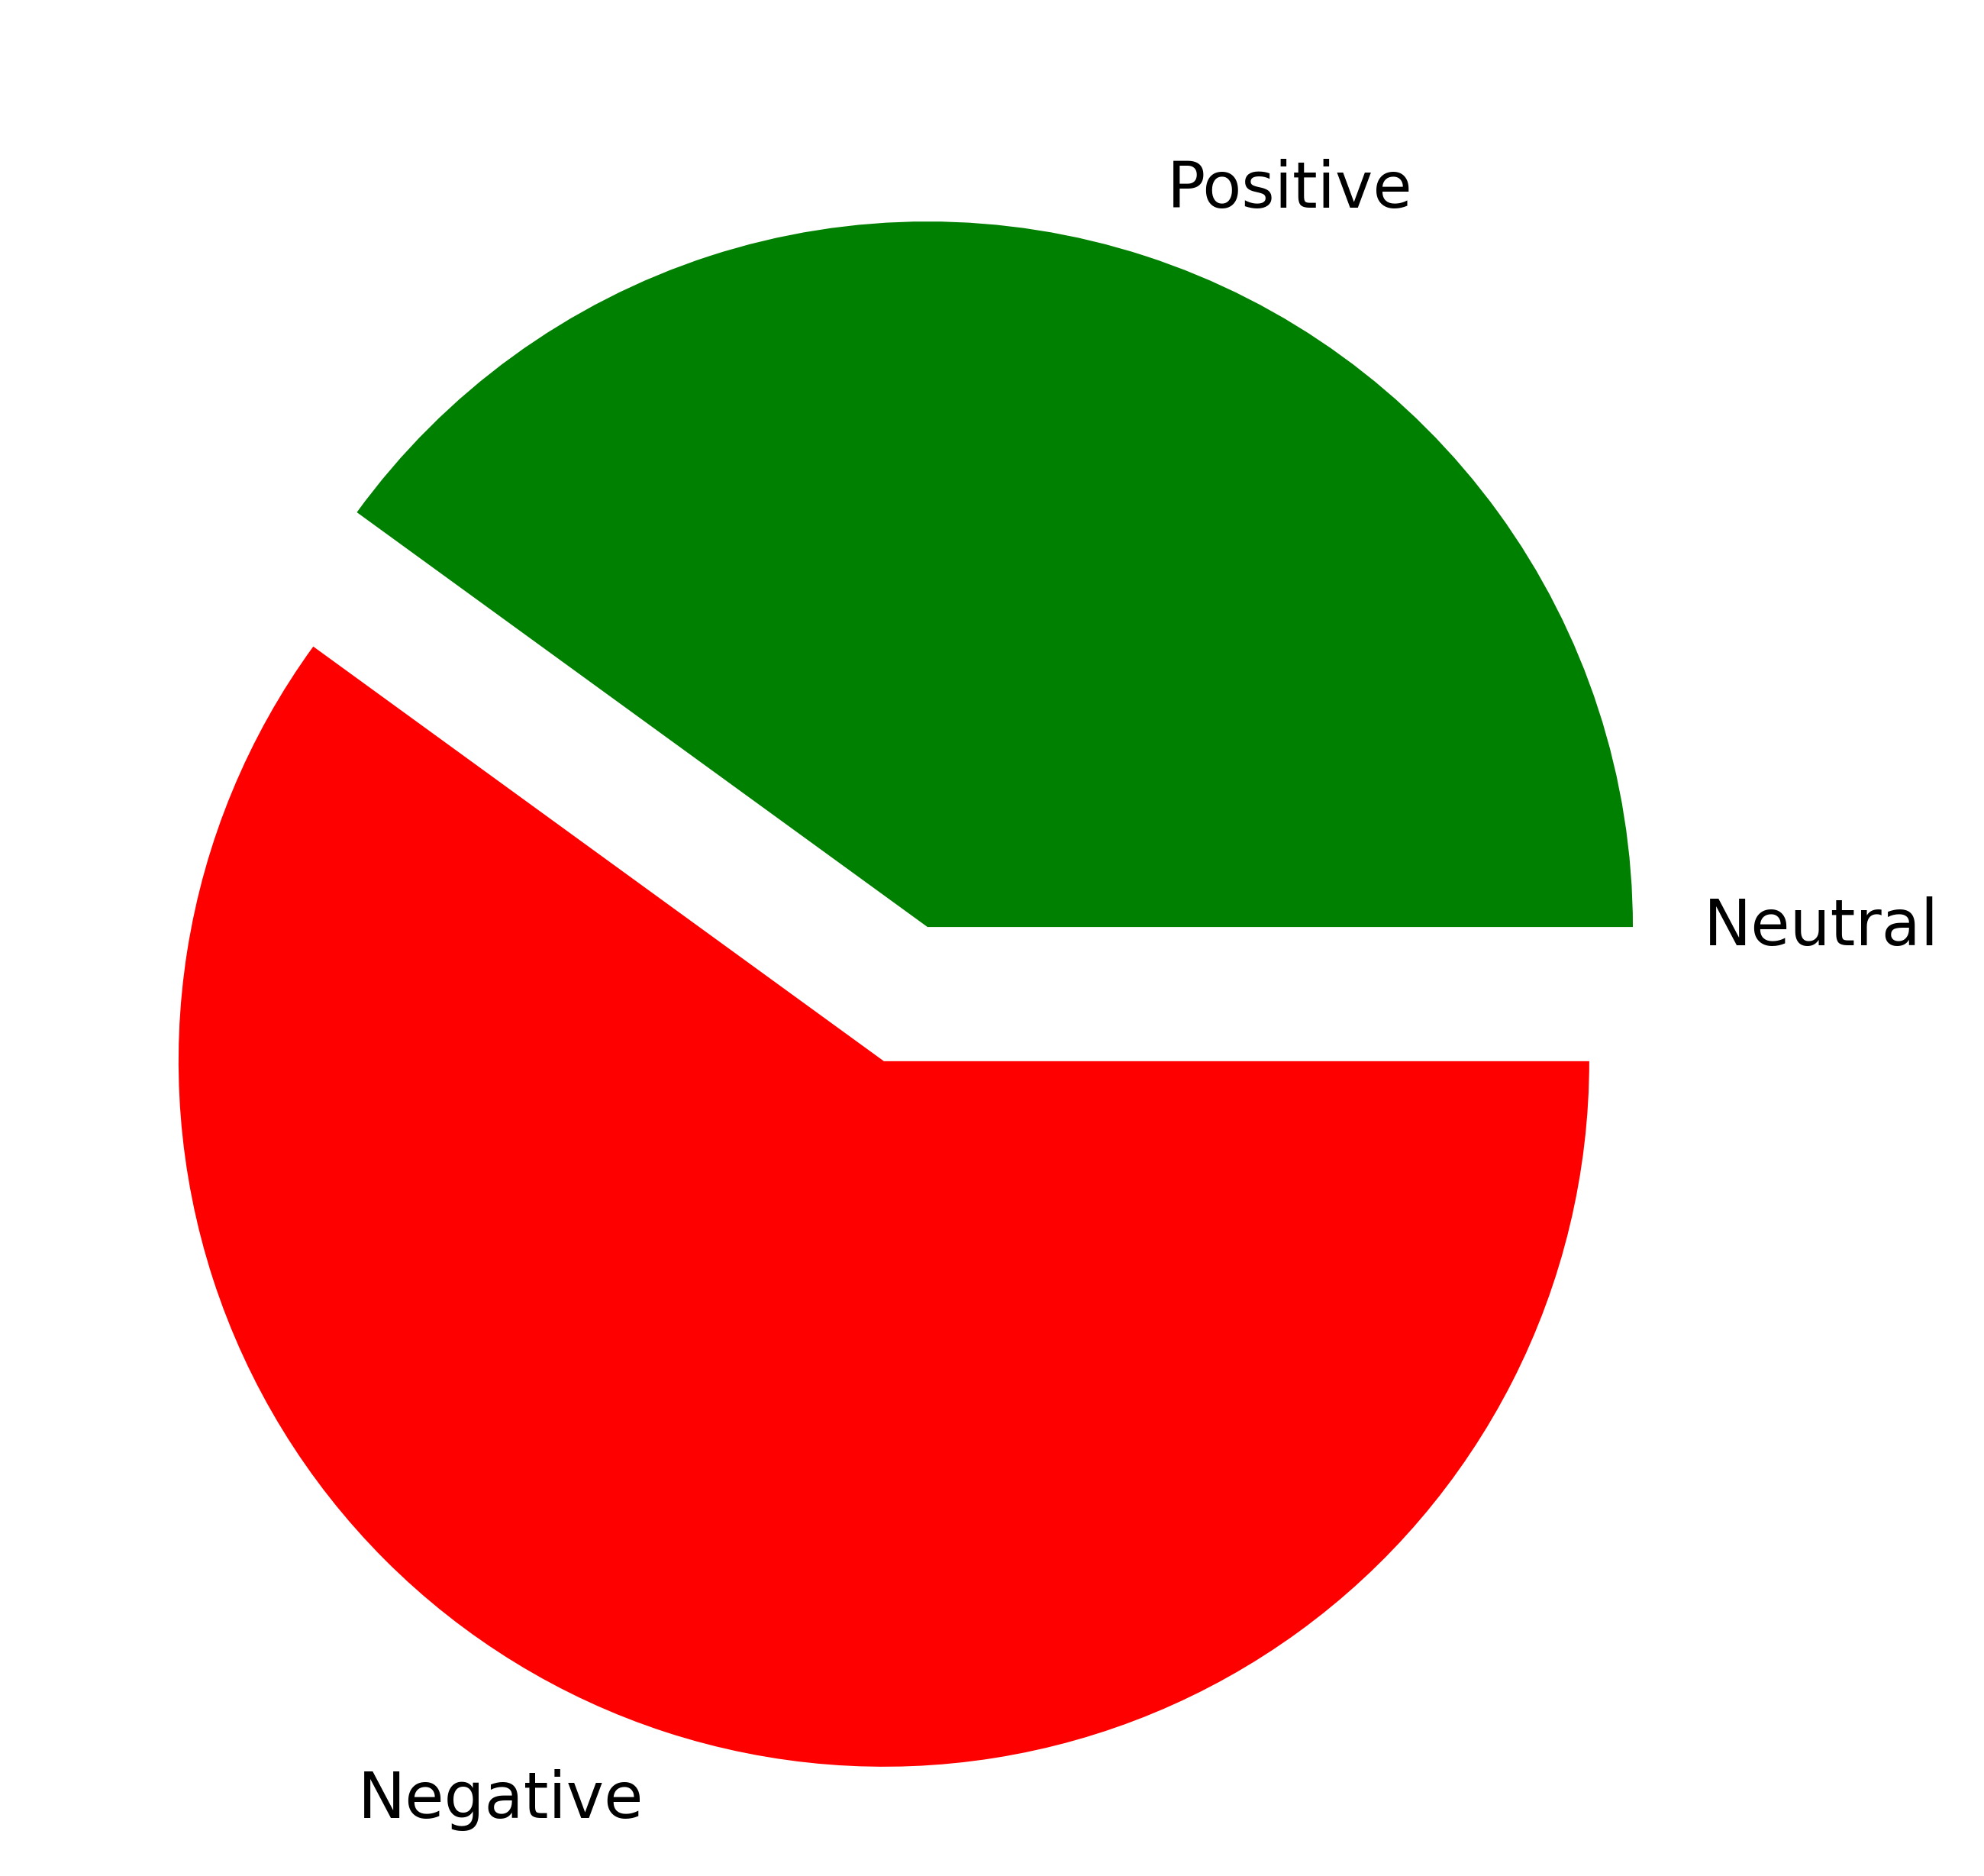

In [ ]:
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]

plt.figure(figsize=(8, 5),
           dpi=600)  # Push new figure on stack
myexplode = [0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
        labels=mylabels, explode=myexplode)
plt.show()

In [ ]:
pos_list = []
neg_list = []
neu_list = []
for i in df["created_time"].unique():
	temp = df[df["created_time"] == i]
	positive_temp = temp[temp["sentiment"] == "positive"]
	negative_temp = temp[temp["sentiment"] == "negative"]
	neutral_temp = temp[temp["sentiment"] == "neutral"]
	pos_list.append(((positive_temp.shape[1]/temp.shape[1])*100, i))
	neg_list.append(((negative_temp.shape[1]/temp.shape[1])*100, i))
	neu_list.append(((neutral_temp.shape[1]/temp.shape[1])*100, i))

neu_list = sorted(neu_list, key=lambda x: x[1])
pos_list = sorted(pos_list, key=lambda x: x[1])
neg_list = sorted(neg_list, key=lambda x: x[1])

x_cord_neg = []
y_cord_neg = []

x_cord_pos = []
y_cord_pos = []

x_cord_neu = []
y_cord_neu = []

for i in neg_list:
	x_cord_neg.append(i[0])
	y_cord_neg.append(i[1])


for i in pos_list:
	x_cord_pos.append(i[0])
	y_cord_pos.append(i[1])

for i in neu_list:
	x_cord_neu.append(i[0])
	y_cord_neu.append(i[1])


plt.figure(figsize=(16, 9),
		dpi=600) # Push new figure on stack
plt.plot(y_cord_neg, x_cord_neg, label="negative",
		color="red")
plt.plot(y_cord_pos, x_cord_pos, label="positive",
		color="green")
plt.plot(y_cord_neu, x_cord_neu, label="neutral",
		color="blue")
plt.xticks(np.arange(0, len(df["date"].unique()) + 1, 5))
plt.xticks(rotation=90)
plt.grid(axis='x')

plt.legend()


In [ ]:
from matplotlib._api import define_aliases
# Removing Punctuation
def remove_punct(text):
	text = "".join([char for char in text if
					char not in string.punctuation])
	text = re.sub('[0-9]+', '', text)
	return text


df['punct'] = df['self_text'].apply(
lambda x: remove_punct(x))

# Applying tokenization
def tokenization(text):
	text = re.split('\W+', text)
	return text


df['tokenized'] = df['punct'].apply(
	lambda x: tokenization(x.lower()))

# Removing stopwords
#stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
	text = [word for word in text if
			word not in stopword]
	return text

define_aliases['nonstop'] = df['tokenized'].apply(
lambda x: remove_stopwords(x))

# Applying Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
	text = [ps.stem(word) for word in text]
	return text

df['stemmed'] = df['nonstop'].apply(
lambda x: stemming(x))

df.head()


,comment_id,score,self_text,subreddit,created_time,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 111,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized
0,k5480sx,1,exactly i can remember the humanitarian aid s...,worldnews,45215.81875,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.030000,0.103333,positive,0.000,0.949,0.051,0.3612,exactly i can remember the humanitarian aid s...,"[exactly, i, can, remember, the, humanitarian,..."
1,k547q14,1,we are the only part of the world that has fr...,Palestine,45215.8166666667,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,1.000000,negative,0.221,0.571,0.208,0.3591,we are the only part of the world that has fr...,"[, we, are, the, only, part, of, the, world, t..."
2,k547elf,1,i don t make israeli strategy nor am i israel...,worldnews,45215.8152777778,NaN,NaN,NaN,NaN,NaN,...,NaN,0.305159,0.425794,positive,0.045,0.721,0.235,0.9161,i don t make israeli strategy nor am i israel...,"[i, don, t, make, israeli, strategy, nor, am, ..."
3,k54742r,1,these people didn t vote hamas in or something...,worldnews,45215.8138888889,NaN,NaN,NaN,NaN,NaN,...,NaN,0.078788,0.225000,negative,0.094,0.862,0.044,-0.7469,these people didn t vote hamas in or something...,"[these, people, didn, t, vote, hamas, in, or, ..."
4,k5473zi,1,we don t care what you do we just want to liv...,worldnews,45215.8138888889,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.347643,0.664815,negative,0.387,0.557,0.056,-0.9831,we don t care what you do we just want to liv...,"[we, don, t, care, what, you, do, we, just, wa..."


In [ ]:
# Applying Countvectorizer
countVectorizer = CountVectorizer(analyzer='word')
countVector = countVectorizer.fit_transform(df['self_text'])
count_vect_df = pd.DataFrame(
    countVector.toarray())
  #columns=countVectorizer.get_feature_names())
count_vect_df.head()

# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,
                            ascending=False).head(20)
countdf[1:11]

,0
46456,116665
3837,107440
32506,89010
25071,70304
23668,64808
45858,64437
25302,61476
46019,58243
51106,53859
4504,41129


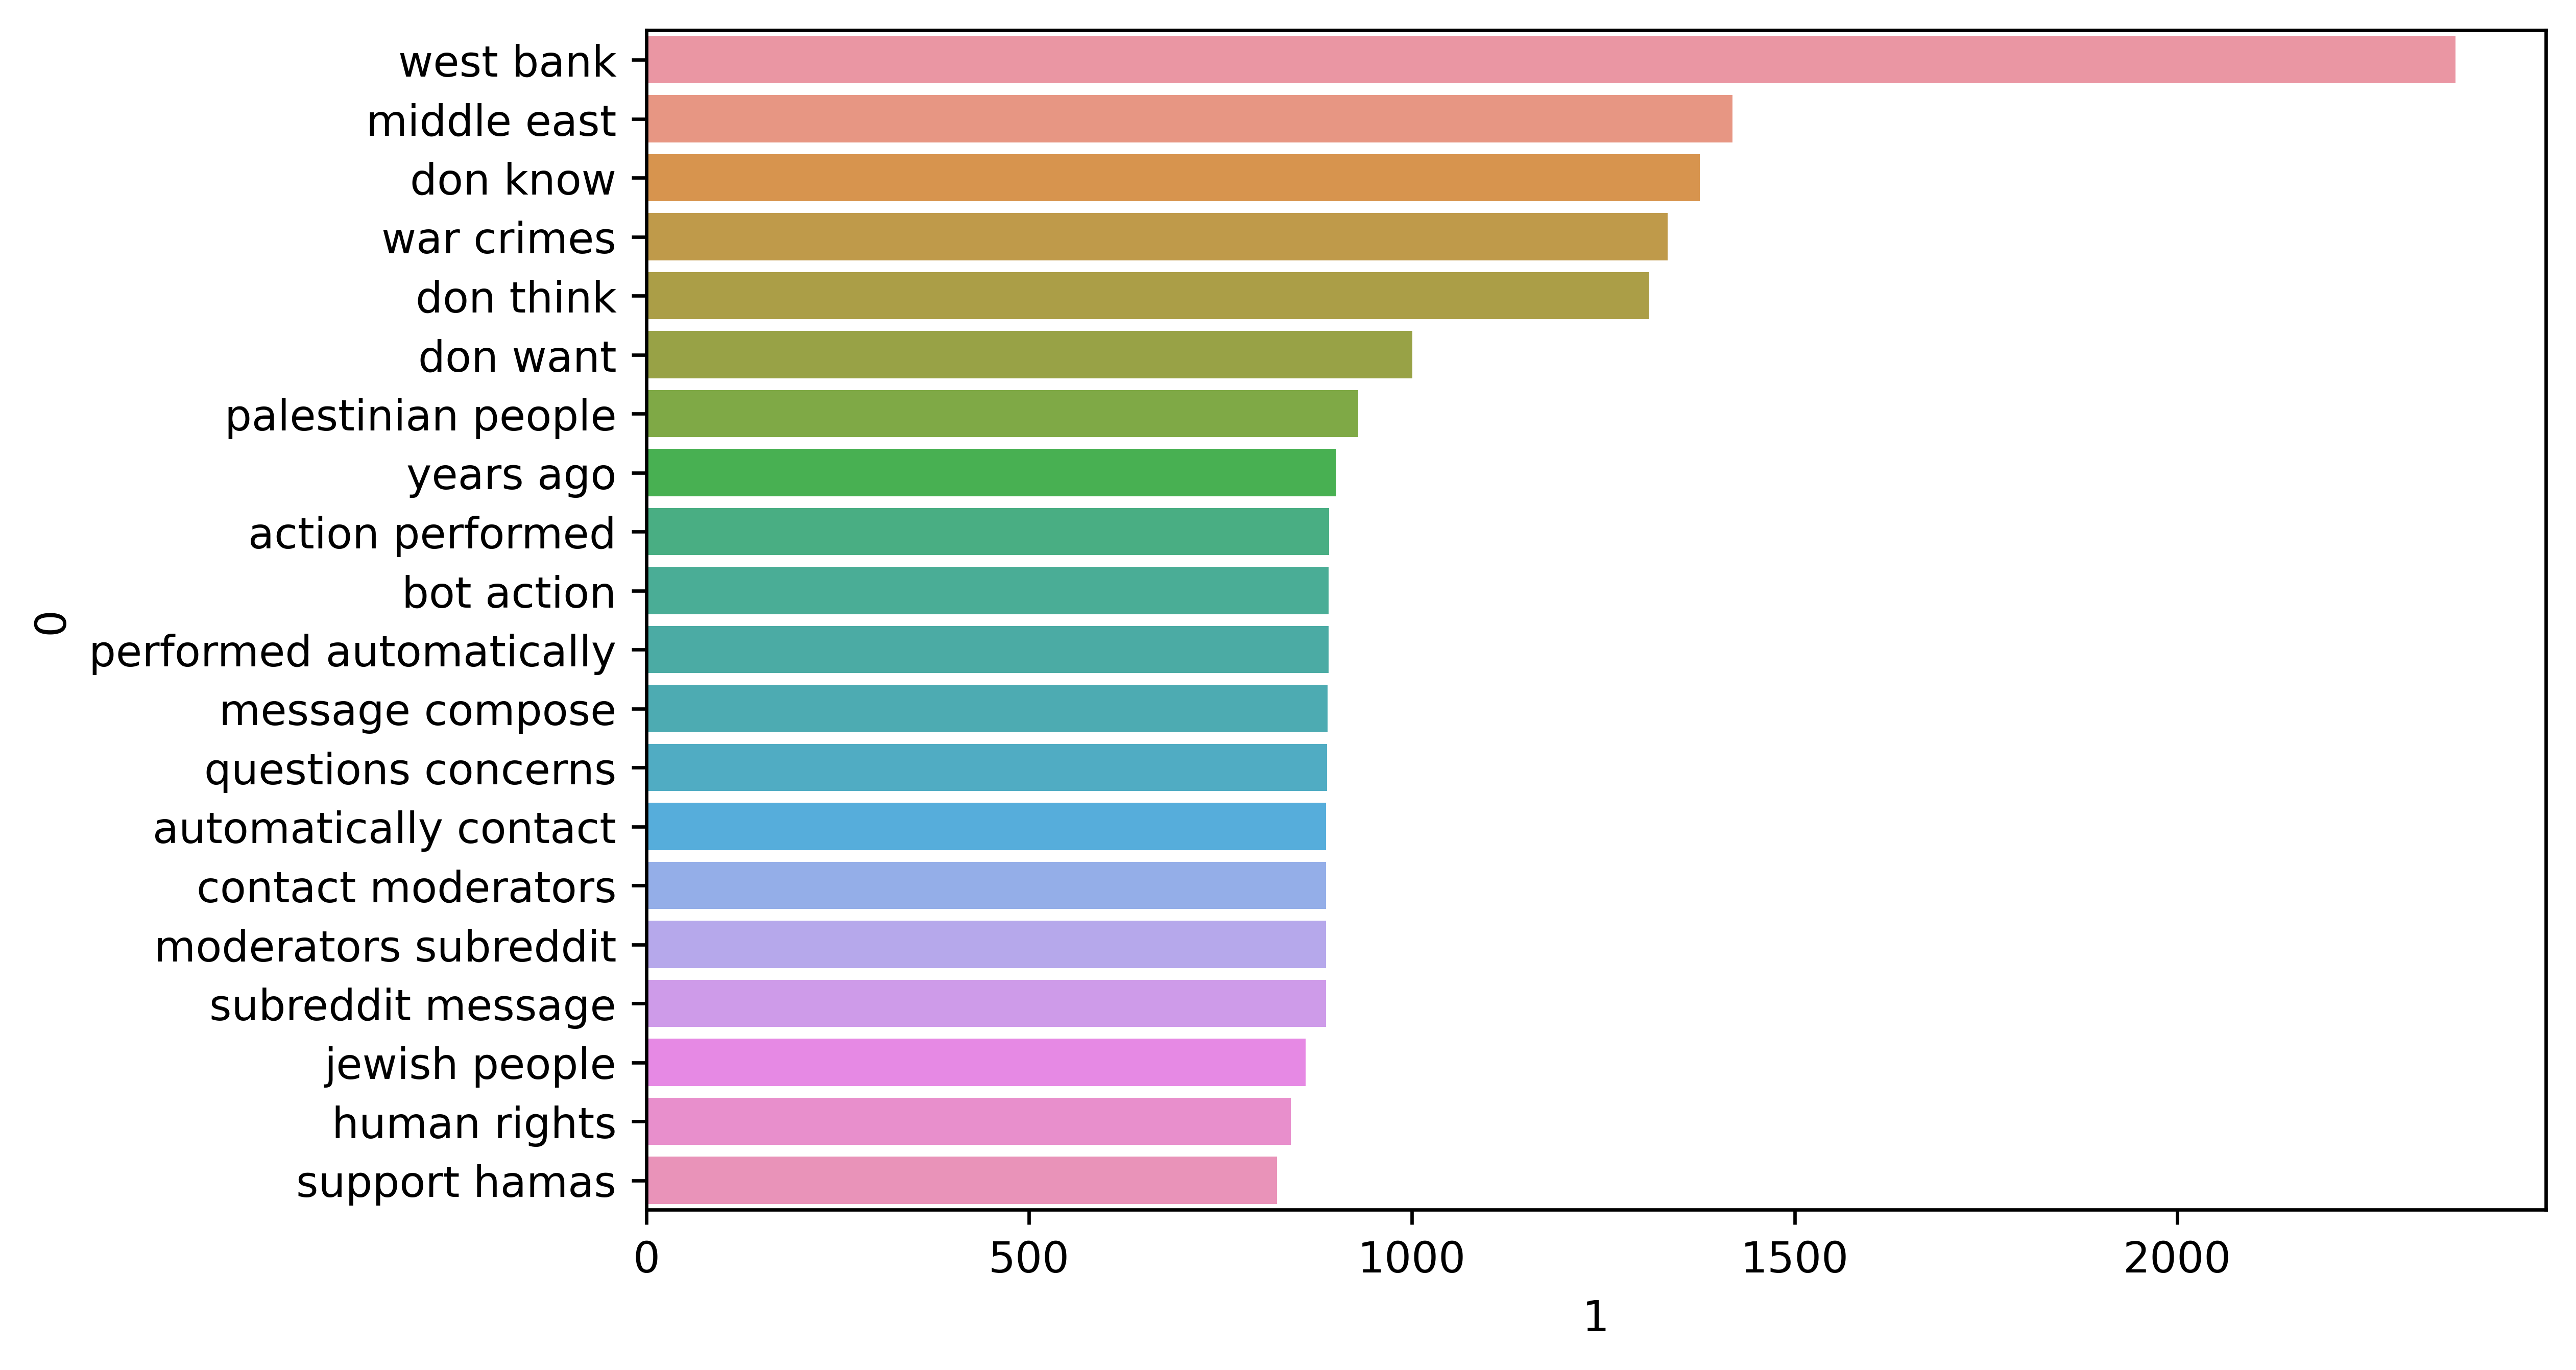

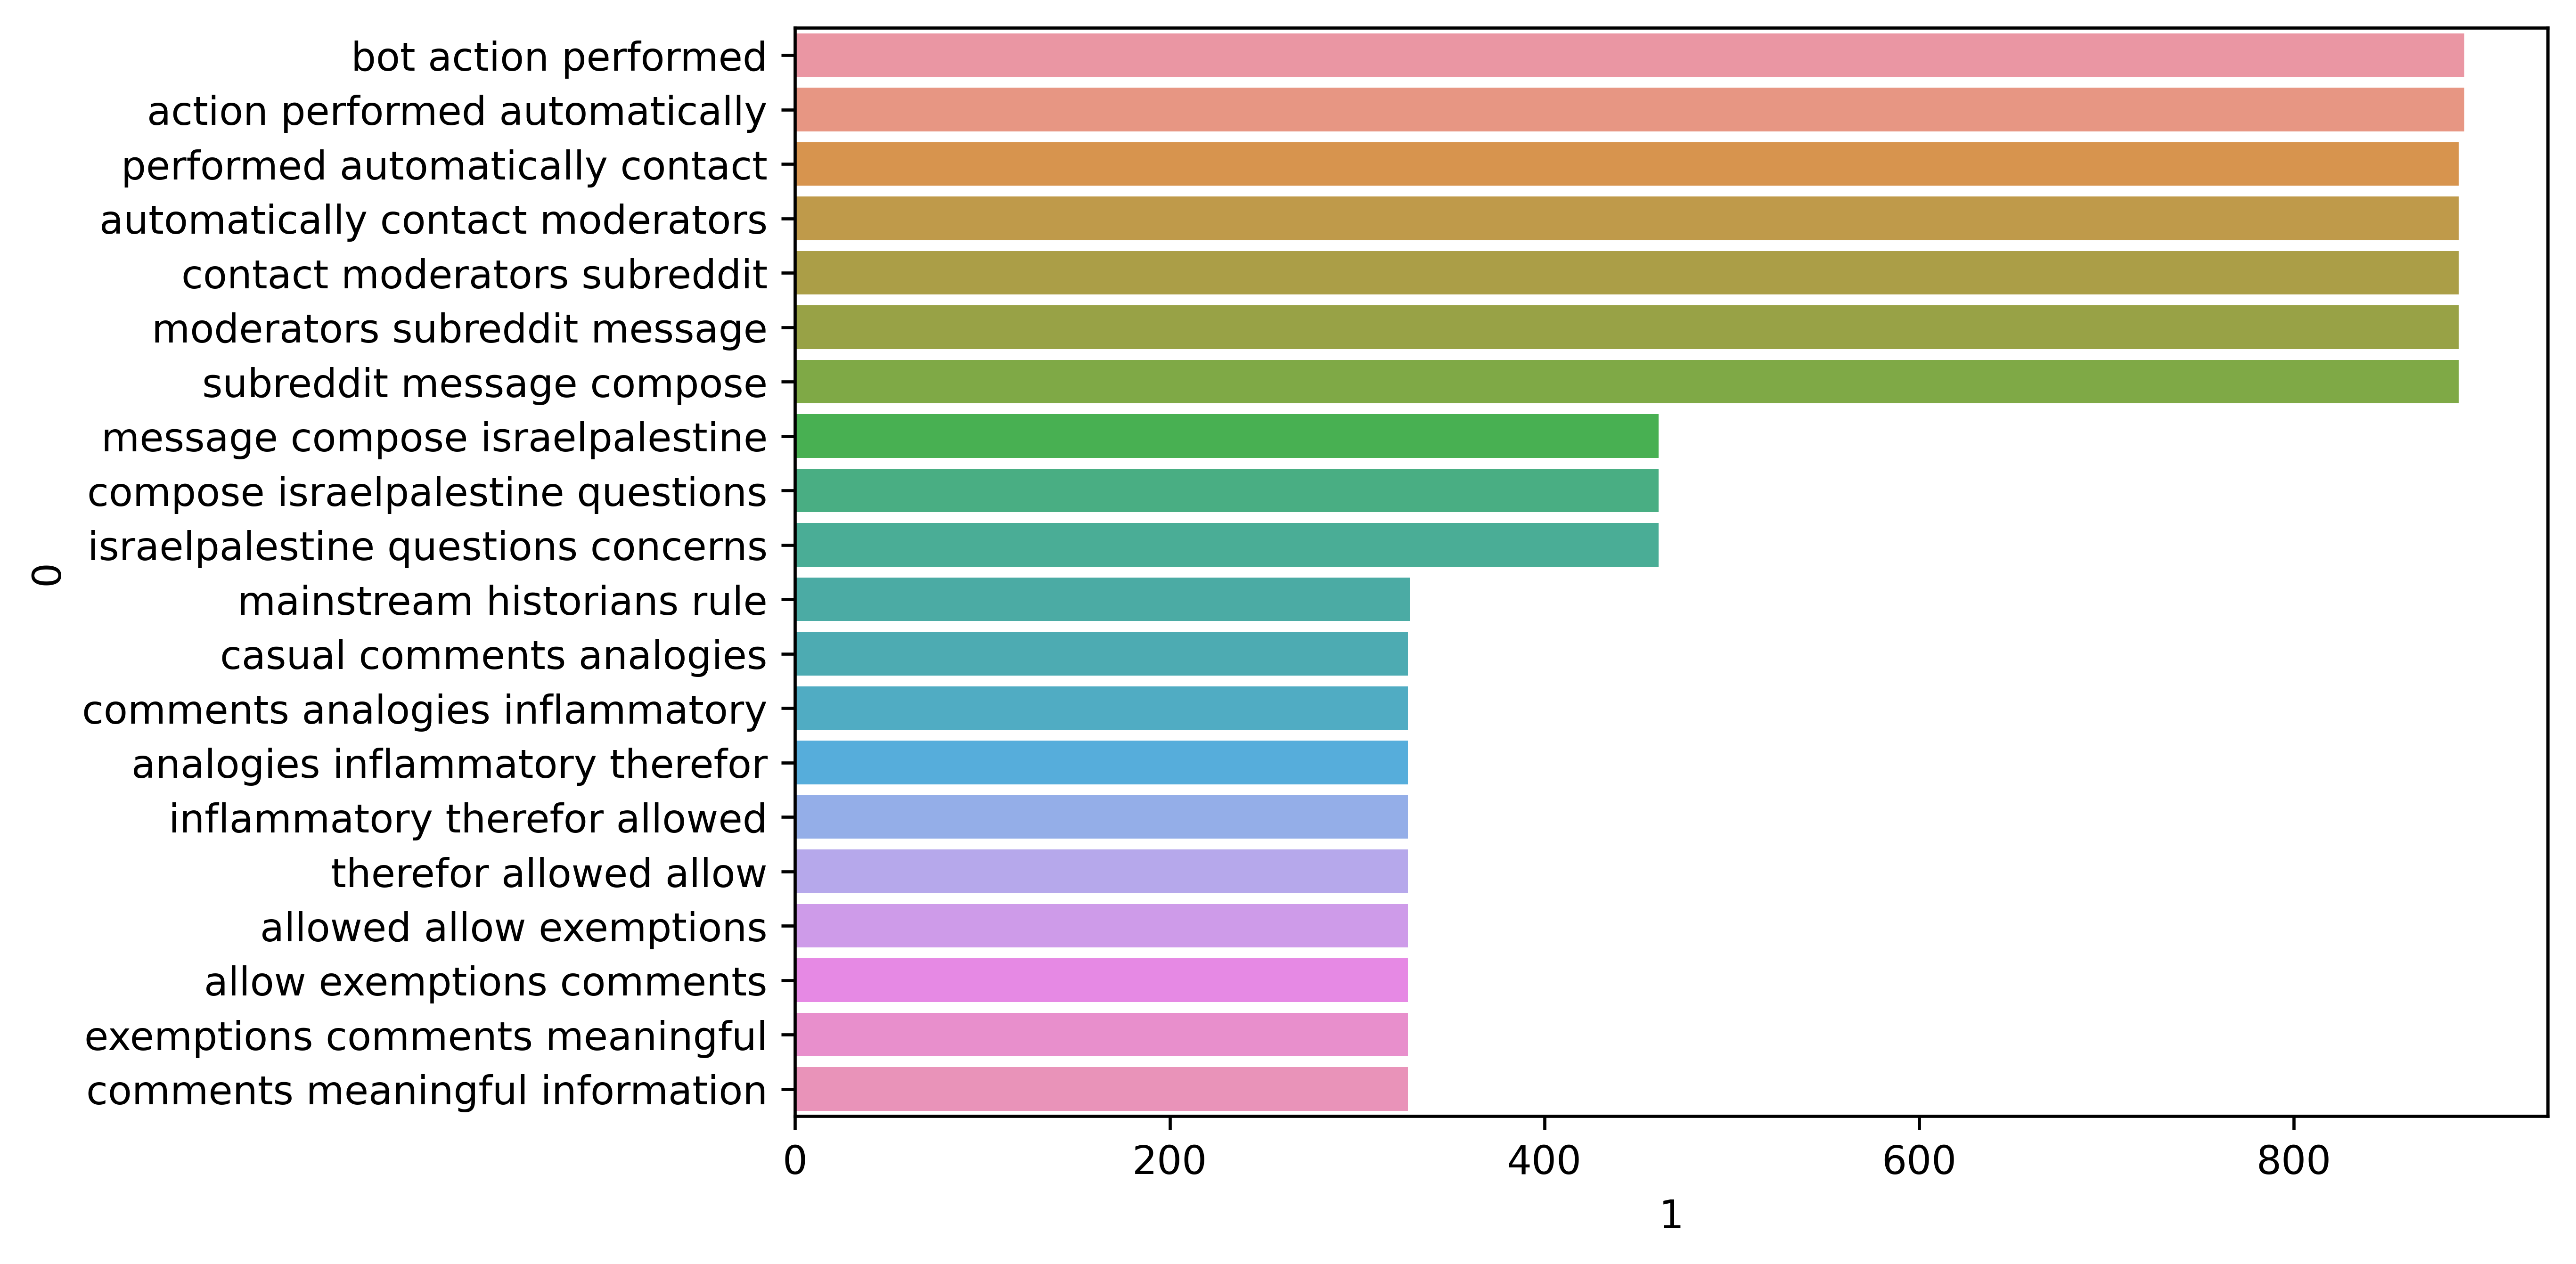

In [ ]:
# Function to ngram
def get_top_n_gram(corpus, ngram_range, n=None):
	vec = CountVectorizer(ngram_range=ngram_range,
						stop_words='english').fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
	return words_freq[:n]

# n2_bigram
n2_bigrams = get_top_n_gram(df['self_text'], (2, 2), 20)
plt.figure(figsize=(8, 5),
		dpi=600) # Push new figure on stack

sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n2_bigrams))
plt.savefig('bigram.jpg') # Save that figure

# n3_trigram
n3_trigrams = get_top_n_gram(df['self_text'], (3, 3), 20)

plt.figure(figsize=(8, 5),
		dpi=600) # Push new figure on stack

sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n3_trigrams))
plt.savefig('trigram.jpg') # Save that figure
